# Logistic Regression - Model Training
## Forest Cover Type Dataset

This notebook trains a Logistic Regression model for multi-class classification. We use SGDClassifier with log_loss, which is computationally efficient for large datasets.

### Key Features:
- Efficient training using SGDClassifier
- Comprehensive evaluation metrics
- Confusion matrix visualization
- Model persistence

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os
import time

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("Libraries imported successfully")

Libraries imported successfully


## 2. Configuration

In [2]:
print("=" * 80)
print("LOGISTIC REGRESSION TRAINING")
print("=" * 80)

LOGISTIC REGRESSION TRAINING


## 3. Load Processed Data

Load the preprocessed data created in the previous notebook.

In [3]:
print("\n[1/5] Loading Processed Data...")

base_dir = os.path.abspath('../..')
data_path = os.path.join(base_dir, 'data_logistic', 'logistic_data.npz')

if not os.path.exists(data_path):
    print(f"Error: {data_path} not found!")
    raise FileNotFoundError("Please run the preprocessing notebook first.")

data = np.load(data_path)
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print(f"✓ Data loaded successfully")
print(f"  - Training samples: {X_train.shape[0]:,}")
print(f"  - Test samples: {X_test.shape[0]:,}")
print(f"  - Features: {X_train.shape[1]}")
print(f"  - Classes: {len(np.unique(y_train))}")


[1/5] Loading Processed Data...


✓ Data loaded successfully
  - Training samples: 464,809
  - Test samples: 116,203
  - Features: 54
  - Classes: 7


## 4. Train Logistic Regression Model

We use `SGDClassifier` with `loss='log_loss'` which implements Logistic Regression via Stochastic Gradient Descent. This is much faster than traditional solvers for large datasets.

### Parameters:
- **loss='log_loss'**: Implements logistic regression
- **max_iter=1000**: Maximum number of iterations
- **tol=1e-3**: Stopping criterion
- **random_state=42**: For reproducibility
- **n_jobs=-1**: Use all CPU cores

In [4]:
print("\n[2/5] Training Logistic Regression...")

start_time = time.time()

clf = SGDClassifier(
    loss='log_loss',
    max_iter=1000,
    tol=1e-3,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"✓ Training complete in {training_time:.2f} seconds")
print(f"  - Iterations performed: {clf.n_iter_}")


[2/5] Training Logistic Regression...


✓ Training complete in 2.19 seconds
  - Iterations performed: 13


## 5. Make Predictions

In [5]:
print("\n[3/5] Generating predictions on test set...")
y_pred = clf.predict(X_test)
print("✓ Predictions generated")


[3/5] Generating predictions on test set...
✓ Predictions generated


## 6. Evaluate Model Performance

In [6]:
acc = accuracy_score(y_test, y_pred)

print("\n" + "=" * 80)
print(f"★ TEST ACCURACY: {acc*100:.2f}%")
print("=" * 80)


★ TEST ACCURACY: 71.14%


## 7. Detailed Classification Report

Display precision, recall, and F1-score for each class.

In [7]:
print("\n[4/5] Detailed Classification Report:")
print("=" * 80)
print(classification_report(y_test, y_pred, digits=4))

report = classification_report(y_test, y_pred, digits=4)


[4/5] Detailed Classification Report:
              precision    recall  f1-score   support

           1     0.7027    0.6997    0.7012     42368
           2     0.7385    0.7854    0.7612     56661
           3     0.6197    0.8017    0.6991      7151
           4     0.5014    0.3242    0.3938       549
           5     0.0000    0.0000    0.0000      1899
           6     0.3837    0.1630    0.2288      3473
           7     0.7668    0.4993    0.6048      4102

    accuracy                         0.7114    116203
   macro avg     0.5304    0.4676    0.4841    116203
weighted avg     0.6953    0.7114    0.6999    116203



## 8. Confusion Matrix Visualization


[5/5] Creating confusion matrix visualization...


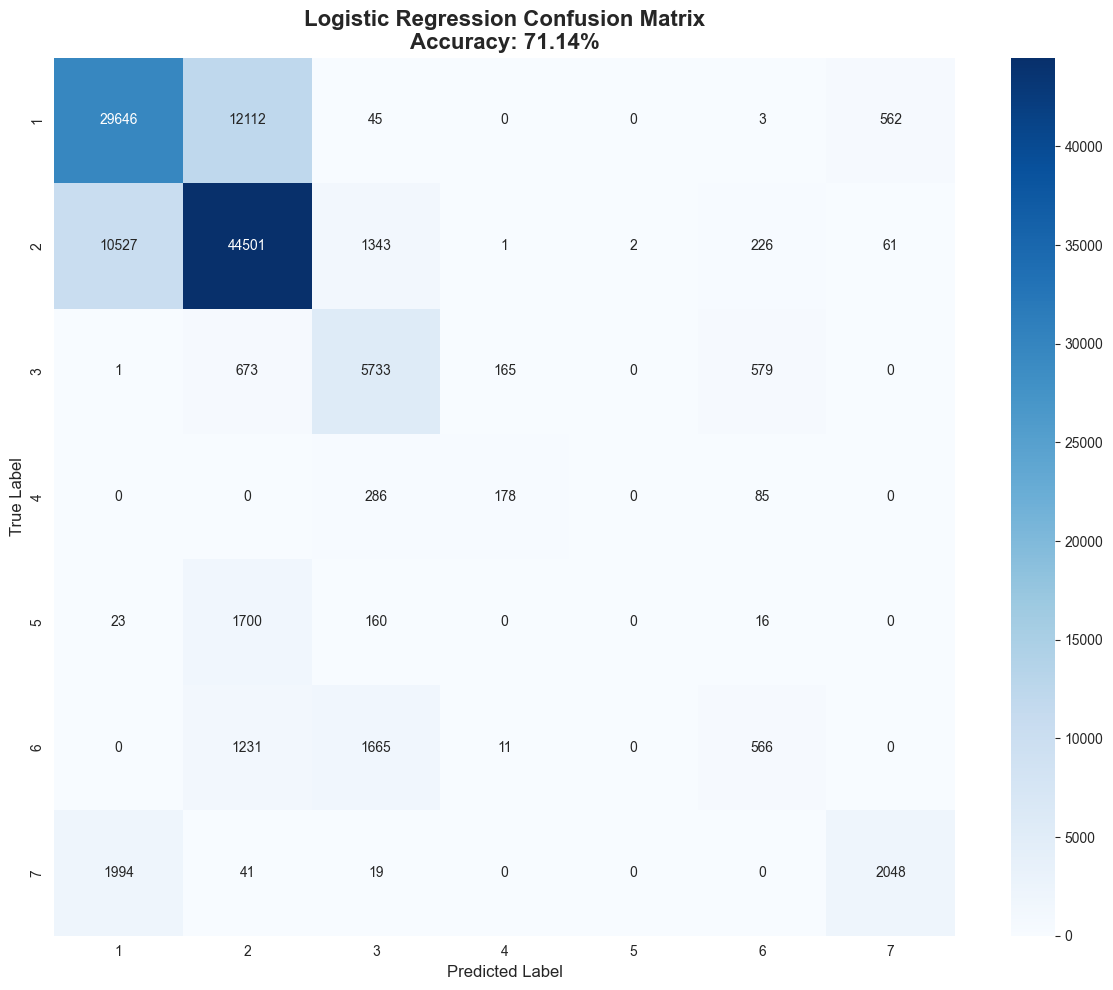

✓ Saved confusion matrix to: C:\PYTHON\AIT511 Course Project 2\archive\logistic_confusion_matrix.png


In [8]:
print("\n[5/5] Creating confusion matrix visualization...")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=range(1, 8),
    yticklabels=range(1, 8)
)
plt.title(f'Logistic Regression Confusion Matrix\nAccuracy: {acc*100:.2f}%', 
          fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()

output_path = os.path.join(base_dir, 'logistic_confusion_matrix.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved confusion matrix to: {output_path}")

## 9. Per-Class Performance Analysis

In [9]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

class_names = [
    'Spruce/Fir',
    'Lodgepole Pine',
    'Ponderosa Pine',
    'Cottonwood/Willow',
    'Aspen',
    'Douglas-fir',
    'Krummholz'
]

print("\nPer-Class Performance:")
print("=" * 90)
print(f"{'Class':<5} {'Name':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("=" * 90)

for i, name in enumerate(class_names):
    print(f"{i+1:<5} {name:<20} {precision[i]:<12.4f} {recall[i]:<12.4f} {f1[i]:<12.4f} {support[i]:<10}")

print("=" * 90)


Per-Class Performance:
Class Name                 Precision    Recall       F1-Score     Support   
1     Spruce/Fir           0.7027       0.6997       0.7012       42368     
2     Lodgepole Pine       0.7385       0.7854       0.7612       56661     
3     Ponderosa Pine       0.6197       0.8017       0.6991       7151      
4     Cottonwood/Willow    0.5014       0.3242       0.3938       549       
5     Aspen                0.0000       0.0000       0.0000       1899      
6     Douglas-fir          0.3837       0.1630       0.2288       3473      
7     Krummholz            0.7668       0.4993       0.6048       4102      


## 10. Save Model

Save the trained model for future use.

In [10]:
model_path = os.path.join(base_dir, 'logistic_model.joblib')
joblib.dump(clf, model_path)
print(f"✓ Model saved to: {model_path}")

✓ Model saved to: C:\PYTHON\AIT511 Course Project 2\archive\logistic_model.joblib


## 11. Summary

In [11]:
print("\n" + "=" * 80)
print("TRAINING COMPLETE")
print("=" * 80)
print(f"✓ Model: Logistic Regression (SGDClassifier)")
print(f"✓ Training time: {training_time:.2f} seconds")
print(f"✓ Test accuracy: {acc*100:.2f}%")
print(f"✓ Training samples: {X_train.shape[0]:,}")
print(f"✓ Test samples: {X_test.shape[0]:,}")
print(f"\nFiles saved:")
print(f"  - Model: {model_path}")
print(f"  - Confusion Matrix: {output_path}")


TRAINING COMPLETE
✓ Model: Logistic Regression (SGDClassifier)
✓ Training time: 2.19 seconds
✓ Test accuracy: 71.14%
✓ Training samples: 464,809
✓ Test samples: 116,203

Files saved:
  - Model: C:\PYTHON\AIT511 Course Project 2\archive\logistic_model.joblib
  - Confusion Matrix: C:\PYTHON\AIT511 Course Project 2\archive\logistic_confusion_matrix.png
